# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.7052,  0.0025,  0.158 ,  0.3381,  0.502 ,  0.8104,  0.2865,  0.9659,  0.5604,  0.2137,
        0.9441,  0.389 ,  0.3644,  0.043 ,  0.1399,  0.5159,  0.8533,  0.2039,  0.1287,  0.8519,
        0.3218,  0.6723,  0.1946,  0.7799,  0.772 ,  0.3438,  0.9174,  0.4169,  0.1557,  0.1918])

In [6]:
y

array([ 10.1157,   8.0076,   8.474 ,   9.0142,   9.5059,  10.4311,   8.8596,  10.8978,   9.6813,
         8.6411,  10.8323,   9.167 ,   9.0933,   8.1291,   8.4198,   9.5477,  10.56  ,   8.6118,
         8.386 ,  10.5556,   8.9654,  10.017 ,   8.5838,  10.3397,  10.3159,   9.0313,  10.7523,
         9.2508,   8.467 ,   8.5755])

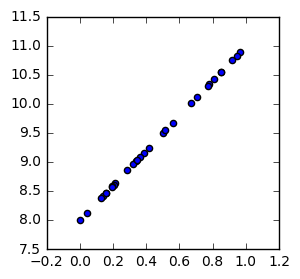

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.9104

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani